## <h1>Lesson 2. Regression analysis: How Much Is Your Car Worth?</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/Kelley_Blue_Book_Vertical.JPG/152px-Kelley_Blue_Book_Vertical.JPG" style="height:200px;">
  
  <p>This exercise will use data collected from <a href="https://www.kbb.com/">Kelly Blue Book</a> for 2005 for used General Motors (GM) cars. The overall goal is to predict the suggested retail price of the car (<a href="http://ww2.amstat.org/publications/jse/jse_data_archive.htm">Kuiper (2008), JSE</a>).</p>

<p>The following features are available for this dataset:</p>
<ul>
<li>Price: Suggested retail price of the used 2005 GM car</li>
<li>Mileage: Car mileage</li>
<li>Cylinder: Number of cylinders in the engine</li>
<li>Doors: Number of doors</li>
<li>Cruise: Does it have cruise control</li>
<li>Sound: Does it have upgraded sound?</li>
<li>Leather: Does it have leather seats?</li>
<li>Make columns (indicator variables):
    <ul>
        <li>Buick</li>
        <li>Cadillac</li>
        <li>Chevy</li>
        <li>Pontiac</li>
        <li>Saab</li>
        <li>...</li>
    </ul>
</li>
<li>Body Type columns (indicator variables):
    <ul>
        <li>convertible</li>
        <li>coupe</li>
        <li>hatchback</li>
        <li>sedan</li>
        <li>...</li>
    </ul>
</li>
</ul>


In [1]:
# Load needed packages and modules
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sc
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [2]:
cars = pd.read_csv('cars.csv')
cars.head()

,Price,Mileage,Cylinder,Doors,Cruise,Sound,Leather,Buick,Cadillac,Chevy,Pontiac,Saab,Saturn,convertible,coupe,hatchback,sedan,wagon
0,22661.05,20105,6,4,1,0,0,1,0,0,0,0,0,0,0,0,1,0
1,21725.01,13457,6,2,1,1,0,0,0,1,0,0,0,0,1,0,0,0
2,29142.71,31655,4,2,1,1,1,0,0,0,0,1,0,1,0,0,0,0
3,30731.94,22479,4,2,1,0,0,0,0,0,0,1,0,1,0,0,0,0
4,33358.77,17590,4,2,1,1,1,0,0,0,0,1,0,1,0,0,0,0


In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 18 columns):
Price          804 non-null float64
Mileage        804 non-null int64
Cylinder       804 non-null int64
Doors          804 non-null int64
Cruise         804 non-null int64
Sound          804 non-null int64
Leather        804 non-null int64
Buick          804 non-null int64
Cadillac       804 non-null int64
Chevy          804 non-null int64
Pontiac        804 non-null int64
Saab           804 non-null int64
Saturn         804 non-null int64
convertible    804 non-null int64
coupe          804 non-null int64
hatchback      804 non-null int64
sedan          804 non-null int64
wagon          804 non-null int64
dtypes: float64(1), int64(17)
memory usage: 113.1 KB


<h3>Q.1. Plot Price vs. Mileage. From the plot, does it seem like cars with more mileage are worth less?</h3>

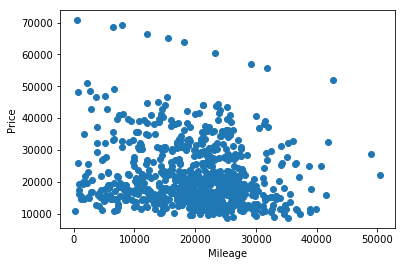

In [4]:
# Put the command (or commands) here that would give answer to the above question.
plt.scatter(cars['Mileage'], cars['Price'])
plt.ylabel('Price')
plt.xlabel('Mileage')
plt.show()

<h3>Q.2. Develop a simple linear regression model, relating price with mileage only. Show summary statistics for the model.</h3> 

In [5]:
# Linear regression model:
slope, intercept, r_value, p_value, std_error = sc.linregress(cars['Mileage'], cars['Price'] )

# Show summary statistics for the model:
print("Y Intercept (Bo): %s" %intercept)
print("Slope (B1): %s" %slope)
print("P Value for Slope: %s" %p_value)
print("R Squared: %f" %(r_value ** 2.0))
print("Standard Error: %f" %std_error)

Y Intercept (Bo): 24764.5589912
Slope (B1): -0.172520502602
P Value for Slope: 4.68469803152e-05
R Squared: 0.020463
Standard Error: 0.042148


<h3>Q.3. What happens to price when there is one more mile on the car?</h3>

In [6]:
# Command:
slope * 1

-0.17252050260202126

For each additional mile on an automobile the price decrease by 17 cents.

<h3>Q.4. What is the expected value of a car with 0 miles according to your model?</h3>

In [7]:
# Single command
intercept

24764.558991201993

The expected value of a car with zero miles would be the equivelent of the intercpet ($\hat{\beta_{o}}$).  Therefore, we would expect the price of the car with zero miles to be $24764.56

<h3>Q.5. Plot residuals of the model vs. fitted values. Are there any problems that you see with the model?</h3>

In [8]:
# Define a function to compute the predicted y values for the training data.  
def predict(x):
    y = slope * x + intercept
    return(y)

# Create a series of predicted y values
pred_y = predict(cars['Mileage'])

# Compute the residuals
residuals = cars['Price'] - pred_y

# Compute MSE for the training data.
simple_trainging_mse = mean_squared_error(cars['Price'], pred_y)
print('Training MSE: {}'.format(simple_trainging_mse.round(2)))

Training MSE: 95591781.67


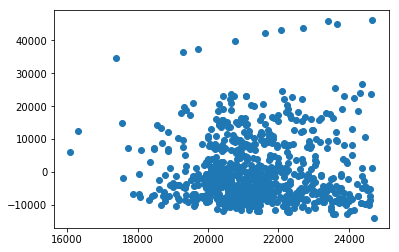

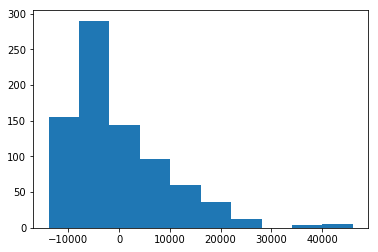

In [9]:
# Plot residual diagnostics
plt.scatter(x = pred_y, y = residuals)
plt.show()

plt.hist(residuals)
plt.show()

Looking at the plot of the residuals vs the fitted values indicates that we may not meet our assumption that the error terms being normally distributed with mean zero and constant variance ($N\sim(\mu, \sigma^2)$).  In particular we see some outliers up high and possibly widening of the residuals as the pridicted values increase.  The histogram also shows that the residuals are not normally distributed or even symetrically distributed.

<h3>Q.6. Develop a model that predicts the Price from Mileage, Cylinder, Doors, Cruise, Sound, Leather data. Is this model more accurate - explain why (1-2 sentence). </h3>

In [10]:
# Commands:
# Create x matrix
X = cars.loc[:, ['Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather']]

# Add a constant so an intercpet is fitted with the model
#X = sm.add_constant(X)

# Create series for Y values
Y = cars.loc[:, 'Price']


model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     1198.
Date:                Tue, 16 Oct 2018   Prob (F-statistic):               0.00
Time:                        20:40:36   Log-Likelihood:                -8307.5
No. Observations:                 804   AIC:                         1.663e+04
Df Residuals:                     798   BIC:                         1.666e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mileage       -0.1196      0.030     -4.030      0.0

In [11]:
mean_squared_error(cars['Price'], model.fittedvalues)

55255086.191617042

Based on a quick evaluaion of the model, it is obvious that the multiple regression model is more accurate than the simple regresion model.  The $R^{2}$ is dramatically increased when compared to the simple model.  Futhermore, the training mean squared error is smaller fur the multiple regression than the simple regression.

<h3>Q.7. Are any of the features in the above model highly colinear to the point where they impact the model quality?</h3>

In [12]:
# Command(s):
X.loc[:, ['Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather']].corr()

,Mileage,Cylinder,Doors,Cruise,Sound,Leather
Mileage,1.000000,-0.029461,-0.016944,0.025037,-0.026146,0.001005
Cylinder,-0.029461,1.000000,0.002206,0.354285,-0.089704,0.075520
Doors,-0.016944,0.002206,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.025037,0.354285,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.026146,-0.089704,-0.062530,-0.091730,1.000000,0.165444
Leather,0.001005,0.075520,-0.061969,-0.070573,0.165444,1.000000


Based on the correlation of the variables included in the model I would argue that multicolinearity is not a problem in this current model.  The strongest correlation we see between variables is 0.35.  This correlation is between the number of cylinders and the inclusion of cruise control.

<h3>Q.8. What is the expected price for the Chevy sedan described in variable 'chevy', shown below?</h3>

In [13]:
# Added constant to the dictionary
chevy_dict = {"Mileage" : 30000,
              "Cylinder" : 4,
              "Doors" : 2,
              "Cruise" : 1,
              "Sound" : 1,
              "Leather" : 1}

# Convert the dictionary to a data frame
chevy_df = pd.DataFrame(chevy_dict, index = [0])
chevy_df = chevy_df[['Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather']]

# Predict the price
predicted_price = model.predict(chevy_df)[0]


print("The predicted price for our Chevy sedan is ${}".format(predicted_price.round(2)))

The predicted price for our Chevy sedan is $18586.25


<h3>Q.9. What is the expected price for the Chevy mentioned above if you include all features in the prediction? Can you comment on any problems you encounter when doing this prediction?</h3>

In [14]:
cars.columns

Index(['Price', 'Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather',
       'Buick', 'Cadillac', 'Chevy', 'Pontiac', 'Saab', 'Saturn',
       'convertible', 'coupe', 'hatchback', 'sedan', 'wagon'],
      dtype='object')

In [15]:
# Commands
parameters = ['Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather',
              'Buick', 'Cadillac', 'Chevy', 'Pontiac', 'Saab', 'Saturn',
              'convertible', 'coupe', 'hatchback', 'sedan', 'wagon']
# Set up model inputs
model2_x = cars[parameters]

# Cereate a series for our respone variable
model2_y = cars['Price']

In [16]:
# Fit our model using stats models functioin.
full_model = sm.OLS(model2_y, model2_x).fit()

print(full_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     607.2
Date:                Tue, 16 Oct 2018   Prob (F-statistic):               0.00
Time:                        20:40:36   Log-Likelihood:                -7544.8
No. Observations:                 804   AIC:                         1.512e+04
Df Residuals:                     789   BIC:                         1.519e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Mileage        -0.1842      0.013    -14.664      

In [17]:
# Set up data for prediction with all the variables.  We need to add values 
# for each of the makes and the car type.
chevy_dict = {"Mileage" : 30000,
              "Cylinder" : 4,
              "Doors" : 2,
              "Cruise" : 1,
              "Sound" : 1,
              "Leather" : 1,
              'Buick' : 0,
              'Cadillac' : 0,
              'Chevy' : 1,
              'Pontiac' : 0,
              'Saab' : 0,
              'Saturn' : 0,
              'convertible' : 0,
              'coupe' : 0,
              'hatchback' : 0,
              'sedan' : 1,
              'wagon' : 0}

# Convert dict to data frame
chevy_df = pd.DataFrame(chevy_dict, index = [0])[parameters]


# Inspect data frame
chevy_df.head()

,Mileage,Cylinder,Doors,Cruise,Sound,Leather,Buick,Cadillac,Chevy,Pontiac,Saab,Saturn,convertible,coupe,hatchback,sedan,wagon
0,30000,4,2,1,1,1,0,0,1,0,0,0,0,0,0,1,0


In [18]:
predicted_price = full_model.predict(chevy_df)
print("The predicted price for our chevy with all variables is ${}".format(predicted_price[0].round(2)))

The predicted price for our chevy with all variables is $7520.46


Interestingly when using all of the predictors we see that our predicted sales price has gone down.  If we look at the coefficents for the model we see the reason why. Assuming all other variables are held constant a vechical of Chevy make has a price reduced by $3408.29